In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
import warnings
import itertools
import statsmodels.api as sm

In [3]:
plt.style.use('fivethirtyeight')

### Confirmed Cases Dataframe

In [5]:
actualConfirmedDF = pd.read_csv('global_confirmed_actual.csv')
actualConfirmedDF = actualConfirmedDF.set_index('Country/Region')
actualConfirmedDF


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,0.0,34.0,10.0,10.0,16.0,0.0,10.0,50.0
Albania,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,13.0,15.0,19.0,23.0,28.0,12.0,11.0,15.0,11.0
Algeria,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,62.0,29.0,34.0,38.0,65.0,42.0,45.0,57.0,73.0
Andorra,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,25.0,20.0,31.0,24.0,36.0,43.0,41.0,26.0,36.0
Angola,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28.0,0.0,7.0,7.0,7.0,16.0,0.0,12.0,0.0,16.0
Vietnam,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,19.0,10.0,11.0,7.0,12.0,10.0,11.0,14.0,15.0
West Bank and Gaza,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,7.0,0.0,0.0,25.0,7.0,7.0,11.0,7.0


# Time-Series Forecasting

In [6]:
allCases=actualConfirmedDF.sum(axis=0)

In [7]:
def getRate(casesList):
    rateList=[0.0]

    for i in range(1,casesList.shape[0]):
        if casesList[i-1]==0:
            rateList.append(0.0)
        else:
            rateList.append(casesList[i]/casesList[i-1])
    return rateList        


In [8]:
def countryWisePlot(country,actualConfirmedDF):
    cases =actualConfirmedDF.loc[country]
    rate=getRate(cases)
    plt.figure(figsize=(20,14))
    plt.plot(cases.index,cases)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=(20,14))
    plt.plot(cases.index,rate)
    plt.xticks(rotation=90)
    display()

## Global Cases

In [ ]:
allCases=actualConfirmedDF.sum(axis=0)
rate=getRate(allCases)
y = pd.Series(rate, index =cases.index) 

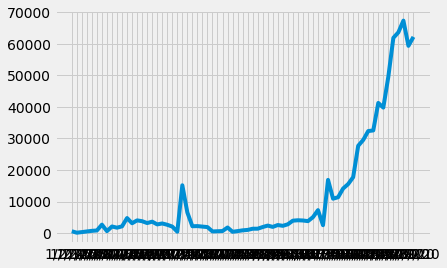

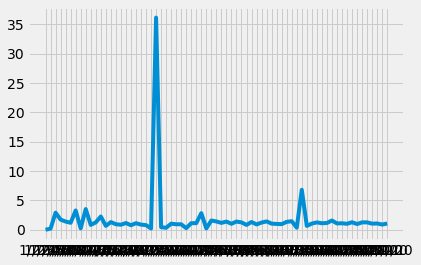

In [10]:
cases = allCases
rate=getRate(cases)
plt.plot(cases.index,cases)
plt.show()
plt.plot(cases.index,rate)
display()

In [227]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [228]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [229]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:61],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:363.66651262226236
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:302.6414775764106
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:327.8586616296559
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:234.23150369409007
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:307.1267078888788
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:289.94835556567
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:215.97759910173465
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:195.59998922905316
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:360.38841352016044
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:299.30937617208656
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:323.7991177721718
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:230.73504756663965
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:309.08350434991456
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:287.0104573092739
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:217.87993980151748
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:192.82335675936656
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:395.2360131144699
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:327.15651756438746
A

In [230]:
mod = sm.tsa.statespace.SARIMAX(y[:56],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5256      0.105     -5.024      0.000      -0.731      -0.321
ar.S.L12      -0.4862      0.036    -13.528      0.000      -0.557      -0.416
sigma2        33.7992      5.302      6.375      0.000      23.408      44.191


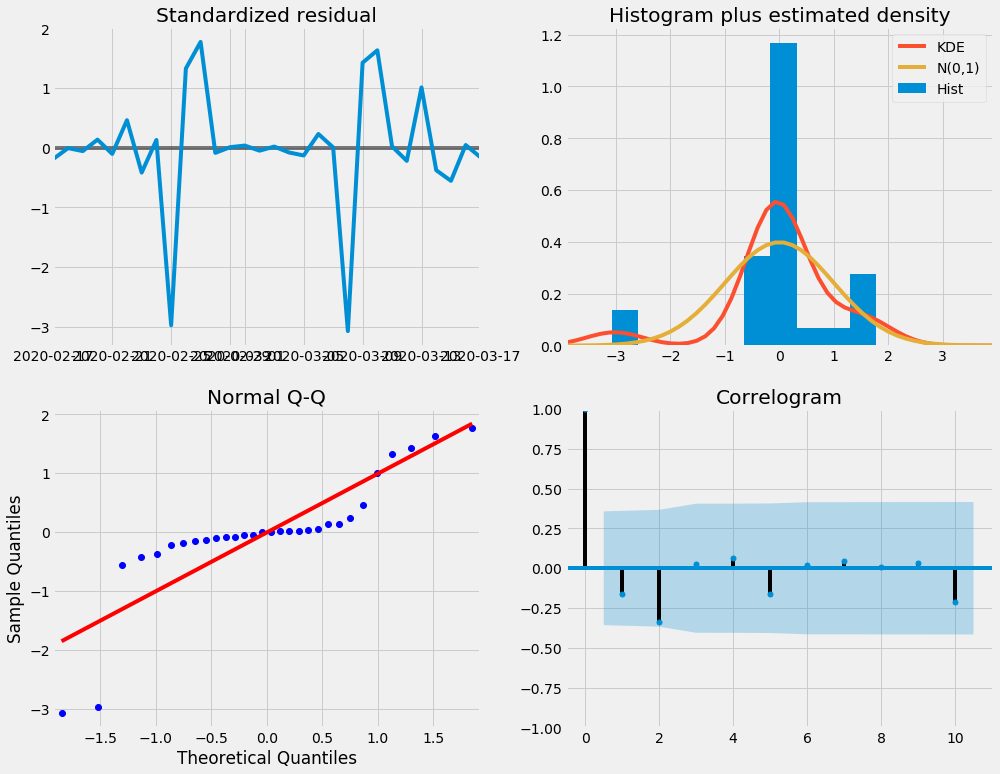

In [231]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [232]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

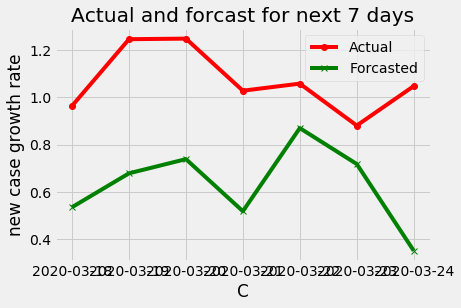

In [235]:
x=pred_uc.predicted_mean.index
Y1=y[-pred_uc.predicted_mean.index.shape[0]:]
Y2=pred_uc.predicted_mean
plt.plot(x, Y1, color = 'red', marker = 'o', label='Actual')
plt.plot(x, Y2, color = 'green',marker = 'x',label='Forcasted')
plt.xlabel("C")
plt.ylabel('new case growth rate')
plt.legend()
plt.title('Actual and forcast for next 7 days')
plt.show()

## US 

In [11]:
casesUS =actualConfirmedDF.loc['US']
rate=getRate(casesUS)
y = pd.Series(rate, index =cases.index) 

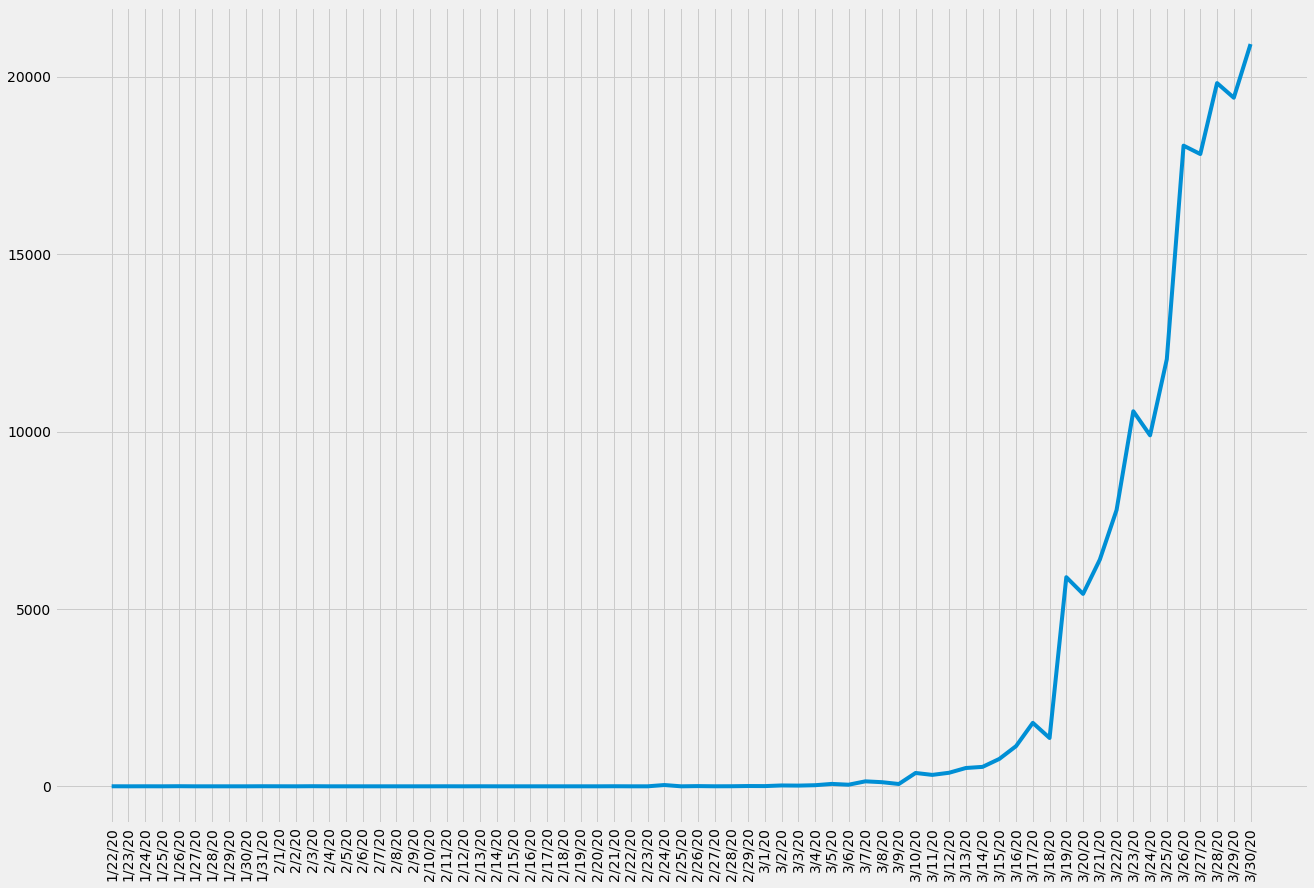

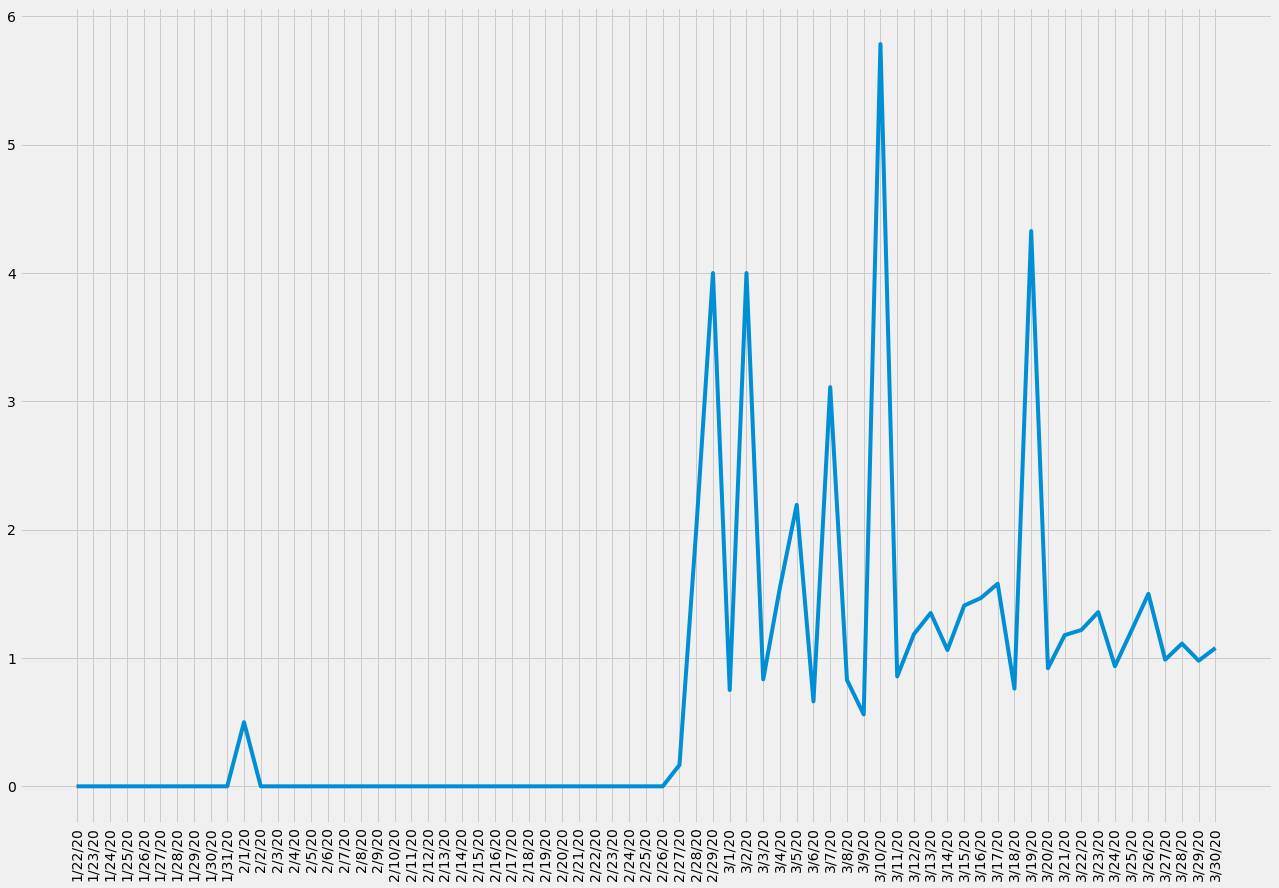

In [12]:
countryWisePlot('US',actualConfirmedDF)

In [14]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [15]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:61],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:215.86739178140712
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:179.41894008898777
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:185.7036305321243
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:152.27985939301774
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:179.9548943277459
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:179.35271484382048
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:147.35948556336118
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:146.50683808879887
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:207.33371328845098
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:174.74814427711271
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:183.82099347557065
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:150.44026910323373
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:178.48705961441348
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:175.40699199074496
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:146.77689508924607
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:143.10587343709673
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:216.3150193439474
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:185.0259681453

In [16]:
mod = sm.tsa.statespace.SARIMAX(y[:56],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6561      0.176     -3.732      0.000      -1.001      -0.312
ar.S.L12      -1.5191      0.484     -3.135      0.002      -2.469      -0.569
sigma2         2.0242      0.309      6.558      0.000       1.419       2.629


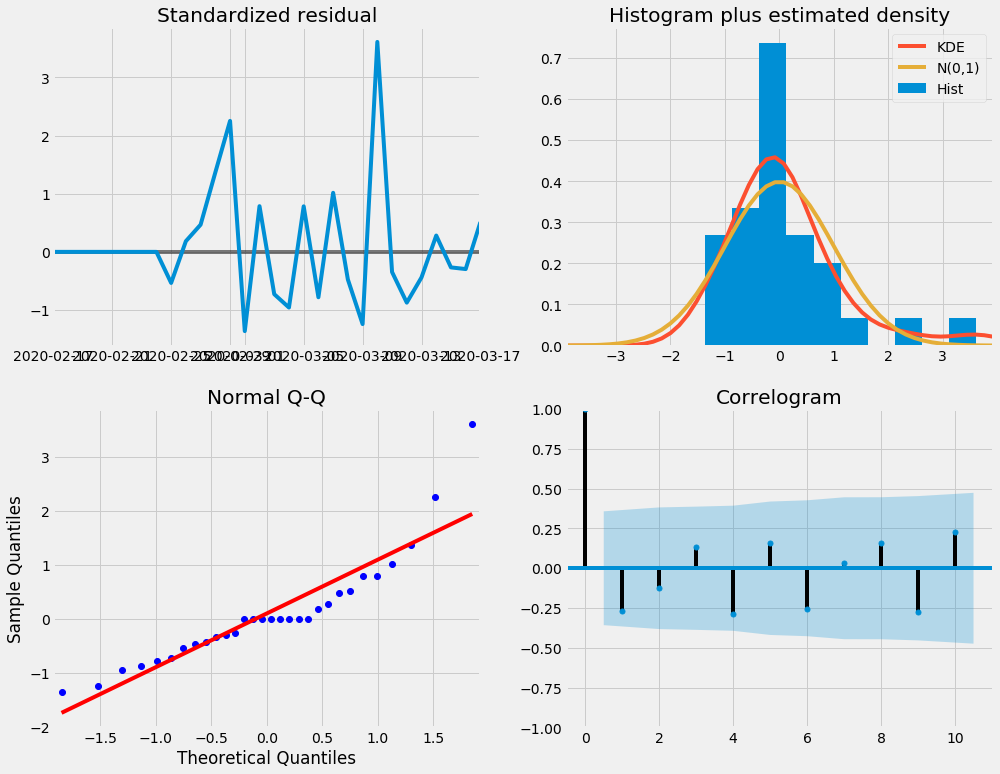

In [17]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [18]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

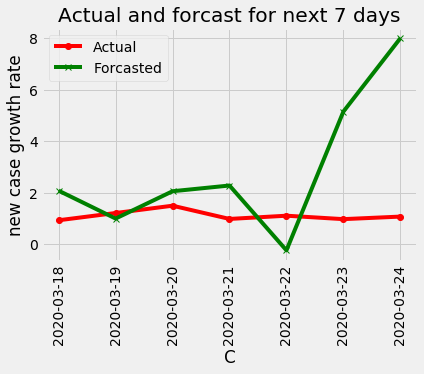

In [19]:
x=pred_uc.predicted_mean.index
Y1=y[-pred_uc.predicted_mean.index.shape[0]:]
Y2=pred_uc.predicted_mean
plt.plot(x, Y1, color = 'red', marker = 'o', label='Actual')
plt.plot(x, Y2, color = 'green',marker = 'x',label='Forcasted')
plt.xlabel("C")
plt.ylabel('new case growth rate')
plt.xticks(rotation=90)
plt.legend()
plt.title('Actual and forcast for next 7 days')
plt.show()

# Italy

In [208]:

casesItaly =actualConfirmedDF.loc['Italy']
rate=getRate(casesItaly)
y = pd.Series(rate, index =cases.index) 

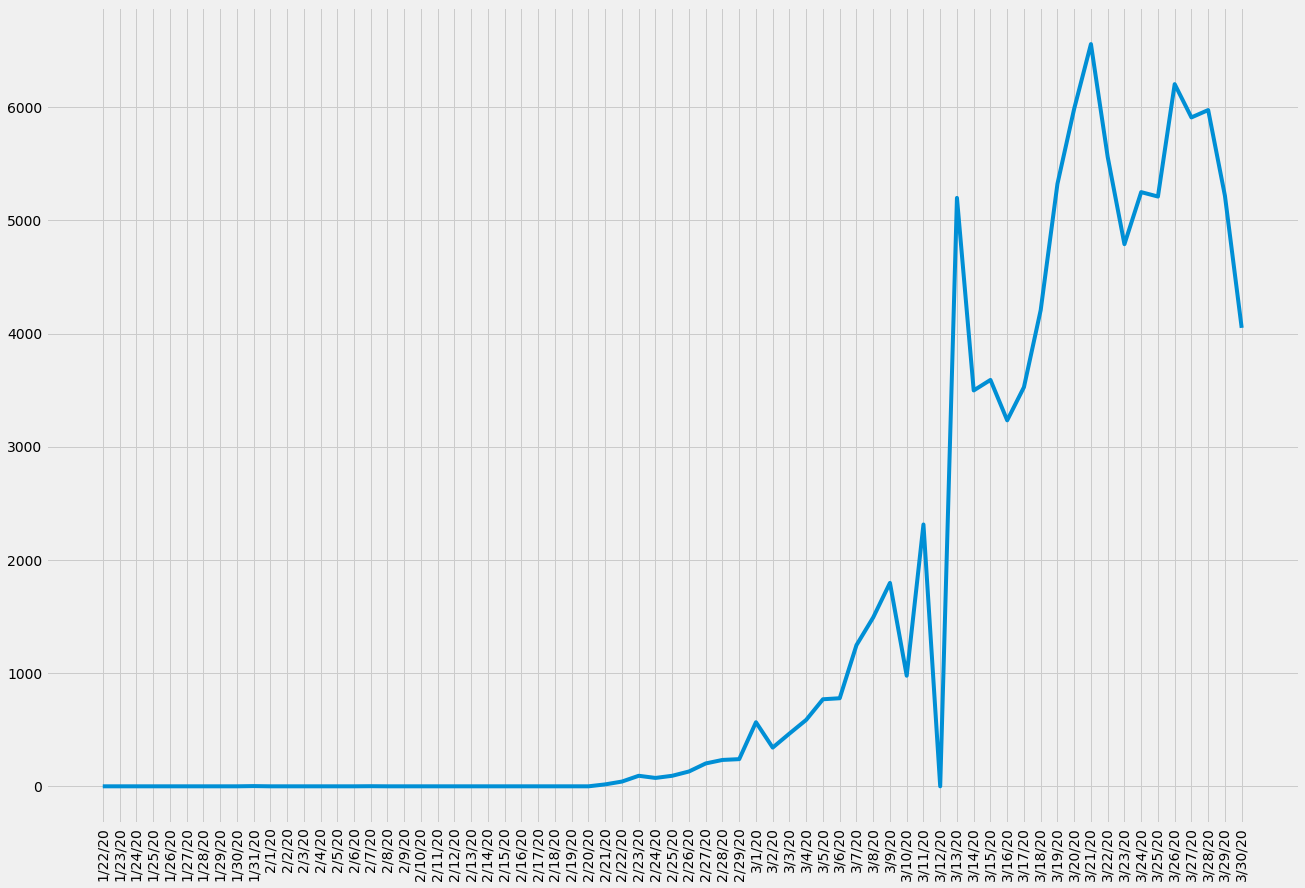

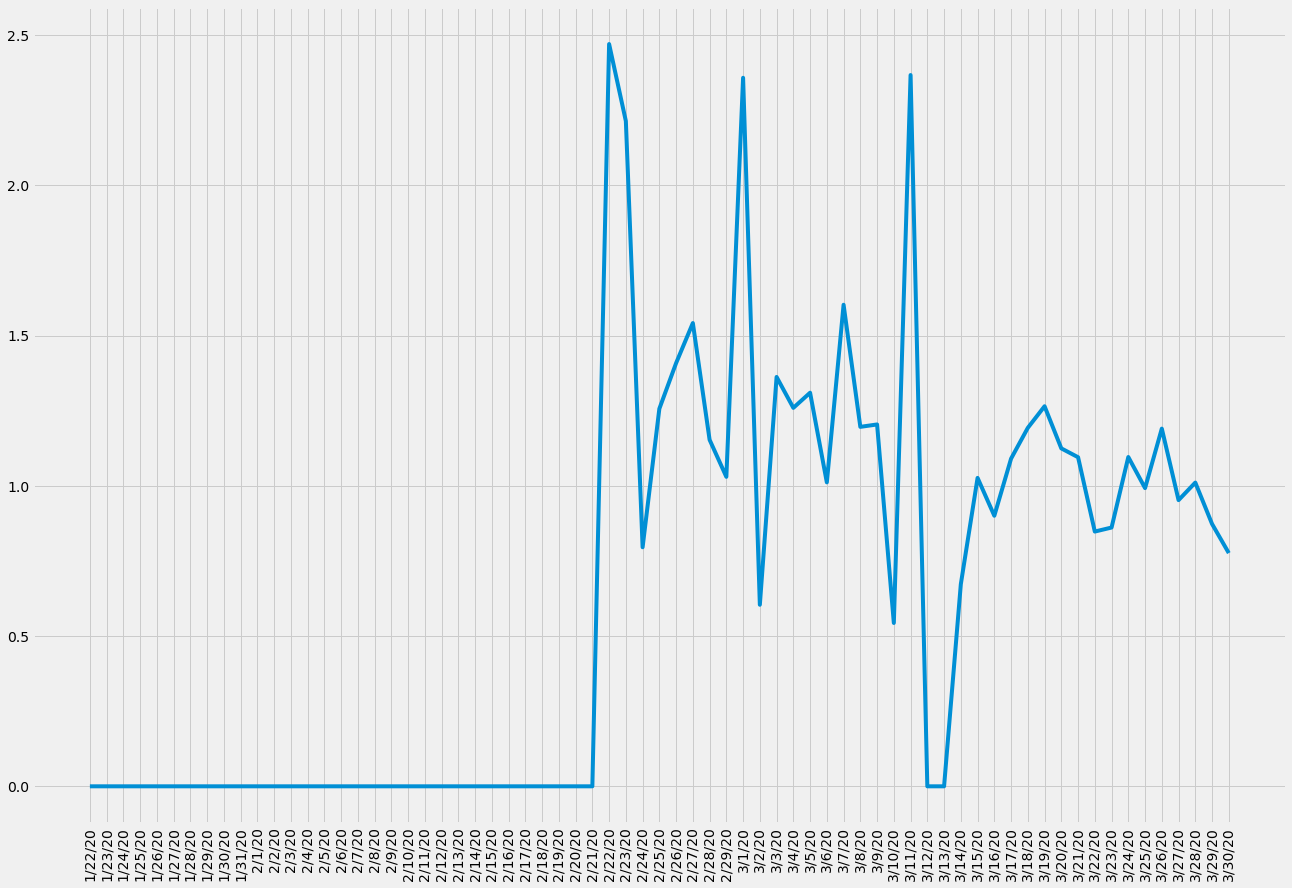

In [241]:
countryWisePlot('Italy',actualConfirmedDF)

In [210]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [218]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[:61],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:164.9981972219145
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:135.69954859671617
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:132.35088789365955
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:106.6288839984353
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:130.08410149200444
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:130.0410458485744
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:109.17432869489079
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:107.0506829654491
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:139.1221789505106
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:119.12752231341545
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:120.93196073926866
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:96.18497047204272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:117.81157734548465
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:116.92929988735804
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:100.90634337073664
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:98.08340313160399
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:118.13138383791673
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:106.84319215896473

In [219]:
mod = sm.tsa.statespace.SARIMAX(y[:56],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4001      0.175     -2.284      0.022      -0.743      -0.057
ar.S.L12      -0.8589      0.168     -5.122      0.000      -1.188      -0.530
sigma2         0.8394      0.202      4.150      0.000       0.443       1.236


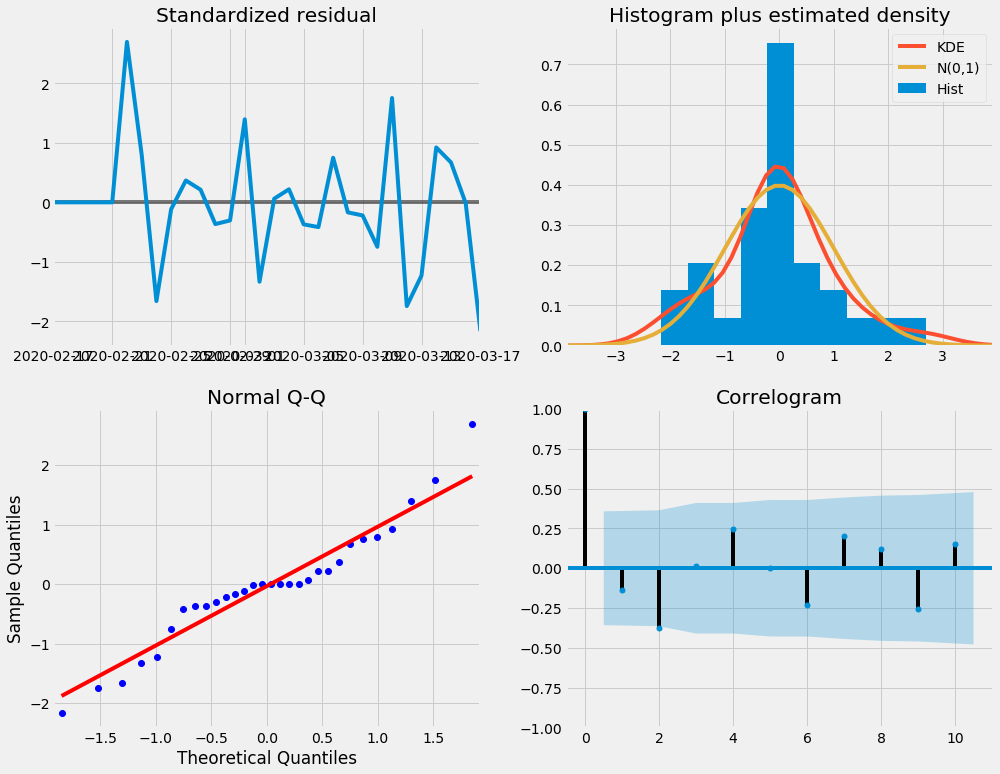

In [220]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [222]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=7)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

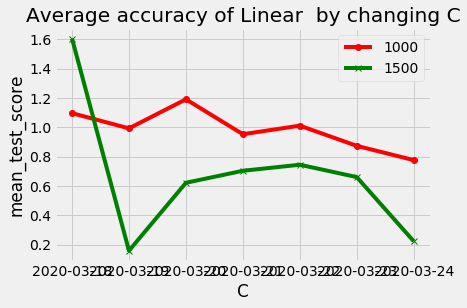

In [224]:
x=pred_uc.predicted_mean.index
Y1=y[-pred_uc.predicted_mean.index.shape[0]:]
Y2=pred_uc.predicted_mean
plt.plot(x, Y1, color = 'red', marker = 'o', label='1000')
plt.plot(x, Y2, color = 'green',marker = 'x',label='1500')
plt.xlabel("C")
plt.ylabel('mean_test_score')
plt.legend()
plt.title('Average accuracy of Linear  by changing '+ "C")
plt.show()

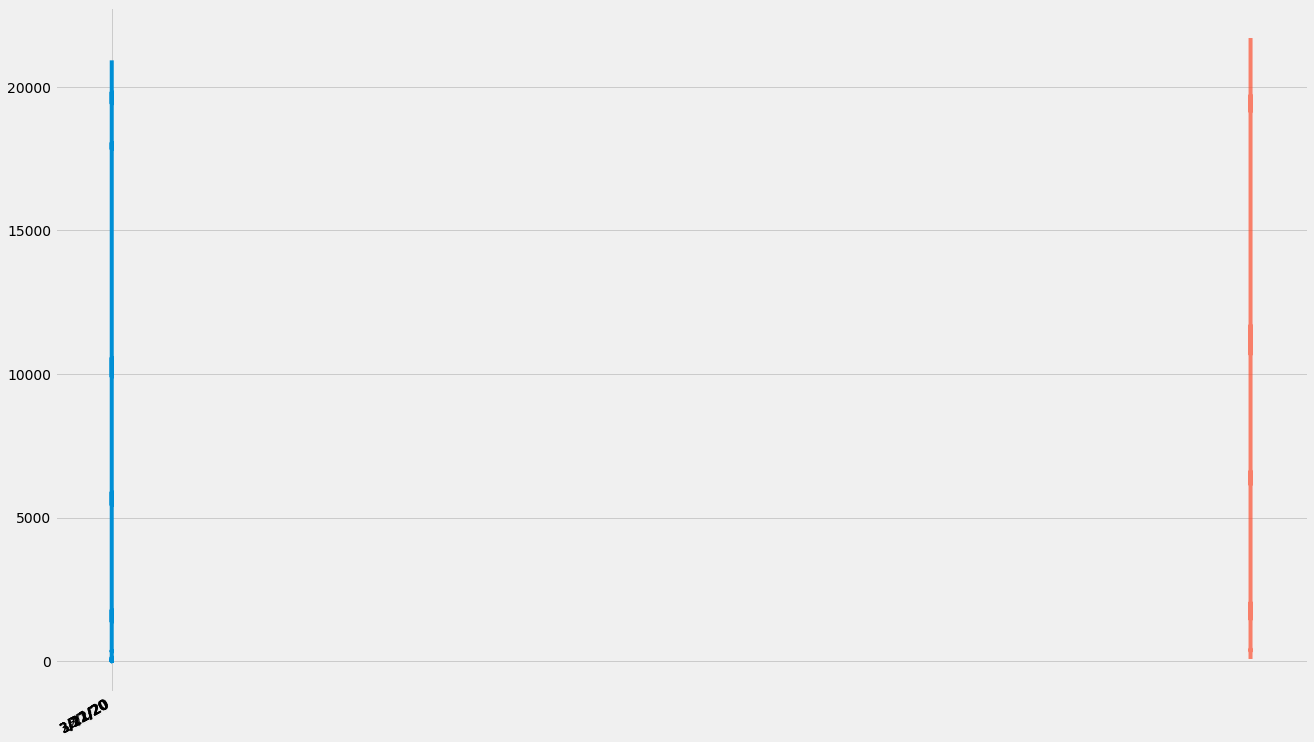

In [120]:
plt.figure(figsize=(20,14))
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

In [105]:
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.show()

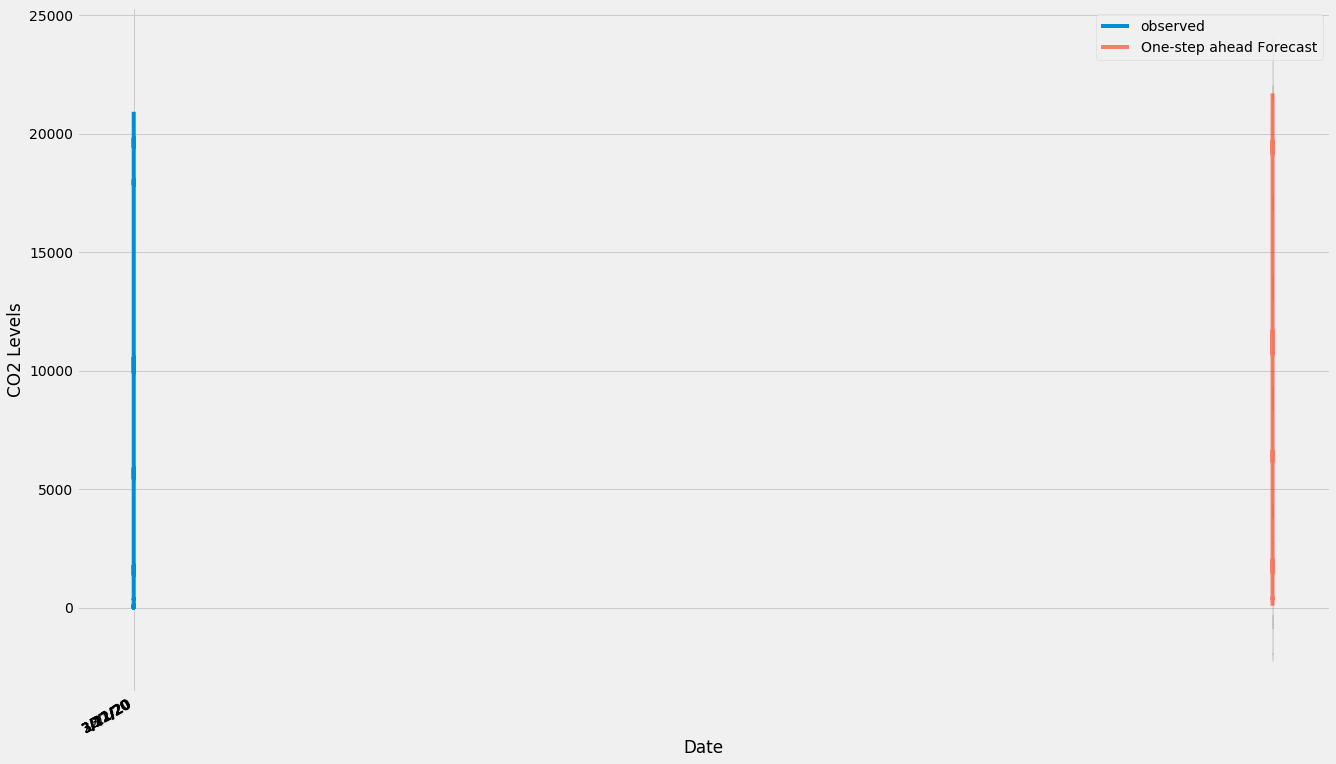

In [101]:
plt.figure(figsize=(20,14))
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()